In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import time
import wave
import pyaudio

In [2]:
def list_audio_devices():
    p = pyaudio.PyAudio()
    info = p.get_host_api_info_by_index(0)
    num_devices = info.get('deviceCount')
    for i in range(num_devices):
        device_info = p.get_device_info_by_host_api_device_index(0, i)
        if device_info.get('maxInputChannels') > 0:
            print(f"Device ID {i} - {device_info.get('name')}")
    p.terminate()



ALSA lib pcm.c:2495:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.rear
ALSA lib pcm.c:2495:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.center_lfe
ALSA lib pcm.c:2495:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.side
ALSA lib pcm_route.c:867:(find_matching_chmap) Found no matching channel map
ALSA lib pcm_route.c:867:(find_matching_chmap) Found no matching channel map
ALSA lib pcm_route.c:867:(find_matching_chmap) Found no matching channel map
ALSA lib pcm_route.c:867:(find_matching_chmap) Found no matching channel map


Listing available audio devices:
Device ID 0 - HDA Intel PCH: ALC256 Analog (hw:0,0)
Device ID 6 - USB PnP Sound Device: Audio (hw:1,0)
Device ID 7 - sysdefault
Device ID 13 - pulse
Device ID 15 - default
Enter the device index to test: 6


ALSA lib pcm.c:2495:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.rear
ALSA lib pcm.c:2495:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.center_lfe
ALSA lib pcm.c:2495:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.side
ALSA lib pcm_route.c:867:(find_matching_chmap) Found no matching channel map
ALSA lib pcm_route.c:867:(find_matching_chmap) Found no matching channel map
ALSA lib pcm_route.c:867:(find_matching_chmap) Found no matching channel map
ALSA lib pcm_route.c:867:(find_matching_chmap) Found no matching channel map


{'index': 6, 'structVersion': 2, 'name': 'USB PnP Sound Device: Audio (hw:1,0)', 'hostApi': 0, 'maxInputChannels': 1, 'maxOutputChannels': 0, 'defaultLowInputLatency': 0.008684807256235827, 'defaultLowOutputLatency': -1.0, 'defaultHighInputLatency': 0.034829931972789115, 'defaultHighOutputLatency': -1.0, 'defaultSampleRate': 44100.0}
Recording from device 6 for 5 seconds...
Finished recording.
Audio data captured successfully.


In [ ]:
print("Listing available audio devices:")
list_audio_devices()

In [ ]:
def test_microphone(device_index, duration=5):
    p = pyaudio.PyAudio()
    
    device_info = p.get_device_info_by_index(device_index)
    print(device_info)

    stream = p.open(format=pyaudio.paInt16,
                    channels=1,
                    rate=44100,
                    input=True,
                    input_device_index=device_index,
                    frames_per_buffer=4096)  # Increased buffer size

    print(f"Recording from device {device_index} for {duration} seconds...")

    frames = []
    try:
        for _ in range(0, int(44100 / 1024 * duration)):
            data = stream.read(1024, exception_on_overflow=False)  # Handle overflow
            frames.append(data)
    except IOError as e:
        print(f"Error recording: {e}")

    print("Finished recording.")

    stream.stop_stream()
    stream.close()
    p.terminate()

    # Check if data was captured
    if len(frames) > 0:
        print("Audio data captured successfully.")
    else:
        print("Failed to capture audio data.")

In [ ]:
device_index = int(input("Enter the device index to test: "))
test_microphone(device_index)

In [3]:
# Define parameters
CHUNK = 8192  # Increased buffer size
FORMAT = pyaudio.paInt16  # Sampling format
CHANNELS = 1  # Mono
RATE = 44100  # Sampling rate
RECORD_SECONDS = 10  # Duration to record
WAVE_OUTPUT_FILENAME = "output.wav"  # Output file name

frames = []

# Callback function to capture audio
def callback(in_data, frame_count, time_info, status):
    frames.append(in_data)
    return (in_data, pyaudio.paContinue)

# Initialize PyAudio
p = pyaudio.PyAudio()

# List available audio devices
info = p.get_host_api_info_by_index(0)
num_devices = info.get('deviceCount')
print("Available audio devices:")
for i in range(num_devices):
    device_info = p.get_device_info_by_host_api_device_index(0, i)
    if device_info.get('maxInputChannels') > 0:
        print(f"Device ID {i} - {device_info.get('name')}")

# Ask user to select device index
device_index = int(input("Enter the device index to use for recording: "))

# Open stream using callback
stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                input_device_index=device_index,
                frames_per_buffer=CHUNK,
                stream_callback=callback)

print("Recording started...")

# Start the stream
stream.start_stream()

# Record for the specified duration
time.sleep(RECORD_SECONDS)

print("Recording finished.")

# Stop and close the stream
stream.stop_stream()
stream.close()
p.terminate()

# Save the recorded data as a WAV file
wf = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(RATE)
wf.writeframes(b''.join(frames))
wf.close()

# Play back the recorded audio
def play_audio(filename):
    wf = wave.open(filename, 'rb')
    p = pyaudio.PyAudio()

    stream = p.open(format=p.get_format_from_width(wf.getsampwidth()),
                    channels=wf.getnchannels(),
                    rate=wf.getframerate(),
                    output=True)

    data = wf.readframes(CHUNK)

    while data:
        stream.write(data)
        data = wf.readframes(CHUNK)

    stream.stop_stream()
    stream.close()
    p.terminate()



ALSA lib pcm.c:2495:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.rear
ALSA lib pcm.c:2495:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.center_lfe
ALSA lib pcm.c:2495:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.side
ALSA lib pcm_route.c:867:(find_matching_chmap) Found no matching channel map
ALSA lib pcm_route.c:867:(find_matching_chmap) Found no matching channel map
ALSA lib pcm_route.c:867:(find_matching_chmap) Found no matching channel map
ALSA lib pcm_route.c:867:(find_matching_chmap) Found no matching channel map


Available audio devices:
Device ID 0 - HDA Intel PCH: ALC256 Analog (hw:0,0)
Device ID 6 - USB PnP Sound Device: Audio (hw:1,0)
Device ID 7 - sysdefault
Device ID 13 - pulse
Device ID 15 - default
Enter the device index to use for recording: 6
Recording started...
Recording finished.


In [7]:
print("Playing back the recorded audio...")
play_audio(WAVE_OUTPUT_FILENAME)

Playing back the recorded audio...


ALSA lib pcm.c:2495:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.rear
ALSA lib pcm.c:2495:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.center_lfe
ALSA lib pcm.c:2495:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.side
ALSA lib pcm_route.c:867:(find_matching_chmap) Found no matching channel map
ALSA lib pcm_route.c:867:(find_matching_chmap) Found no matching channel map
ALSA lib pcm_route.c:867:(find_matching_chmap) Found no matching channel map
ALSA lib pcm_route.c:867:(find_matching_chmap) Found no matching channel map
ALSA lib pcm.c:8306:(snd_pcm_recover) underrun occurred


Plotting the waveform of the recorded audio...


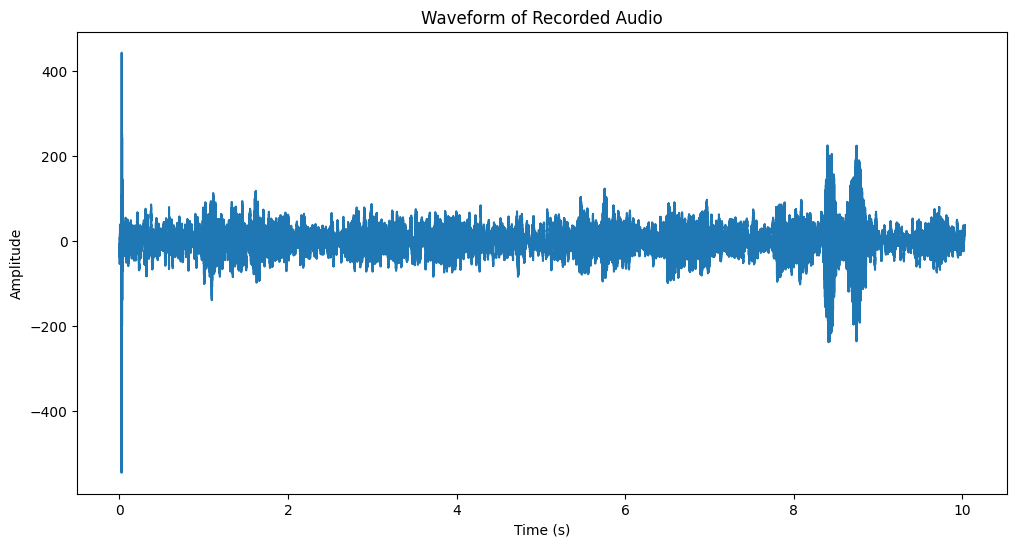

In [6]:
# Function to plot the waveform
def plot_waveform(filename):
    wf = wave.open(filename, 'rb')
    n_channels = wf.getnchannels()
    sampwidth = wf.getsampwidth()
    framerate = wf.getframerate()
    n_frames = wf.getnframes()
    audio_data = wf.readframes(n_frames)
    wf.close()

    # Convert audio data to numpy array
    audio_data = np.frombuffer(audio_data, dtype=np.int16)

    # Create time array
    time_array = np.linspace(0, n_frames / framerate, num=n_frames)

    # Plot waveform
    plt.figure(figsize=(12, 6))
    plt.plot(time_array, audio_data)
    plt.title("Waveform of Recorded Audio")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.show()

print("Plotting the waveform of the recorded audio...")
plot_waveform(WAVE_OUTPUT_FILENAME)